# Lab / Homework

1. Last week you wrote a function that loads fMRI data from a nifti file. Expand this function to have the following arguments: 
    - to convert the timecourse for each voxel to standard scores, 
    - and to mask the data. 

2. Write a function (as general as possible) to unmask data. You should be able to apply this unmasking function to 1D data (to retrieve a single volume) or to 2D data (to retrieve a 4D volume timecourse).

3. In a real experiment, you often end up with data (in a [time x voxels] array) that you want to interpret in terms of events in the world (say, stimulus onset times). Onset times take the form of a vector of indices or times. Here's a dummy example:

In [3]:
n_tps = 200 
n_voxels = 30 
data = np.random.randn(n_tps, n_voxels)

onsets = range(5, n_tps, 20)
print(list(onsets))

[5, 25, 45, 65, 85, 105, 125, 145, 165, 185]


Write a function that computes the average timecourse of a data set for 10 samples after each condition onset. The inputs to the function should be `data` and `onsets`, and the output for the function for the above example dummy data should be an array of size [10 x 30] (10 time points per voxel). 

(1)

In [6]:
# Packages we will use
import nibabel
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy 

In [16]:
# Loading fMRI data
def load_data(fname, mask=None, standardize=False):
    """Load fMRI data from nifti file, optionally with masking and standardization"""
    nii = nibabel.load(fname)
    data = nii.get_data().T.astype(np.float32)
    if mask is not None:
        data = data[:, mask]
    if standardize:
        #Alternative: data = scipy.stats.zscore(data, axis=0)    
        data = data - data.mean(axis=0)
        data = data / data.std(axis=0) 
    return data # as a 4D or 2D array

In [17]:
# Demonstrate that this works
fname = '/home/shared/cogneuro-connector/data/fmri/categories/sub01_categories1_1.nii.gz'
mask_fname = '/home/shared/cogneuro-connector/data/fmri/categories/s01_category_mask_cortical.npz'
mask = np.load(mask_fname)['mask']
print('Mask shape: ', mask.shape)
voxels = [100, 5000, 10000, 30000]

Mask shape:  (30, 100, 100)


(120, 38543)


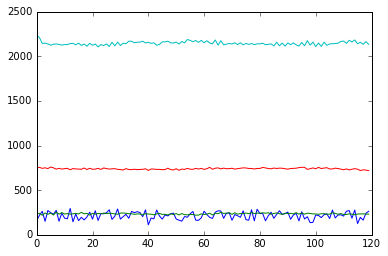

In [18]:
# Data not in standard score
data = load_data(fname, mask=mask)
print(data.shape)
for vx in voxels:
    plt.plot(data[:, vx])

(120, 38543)


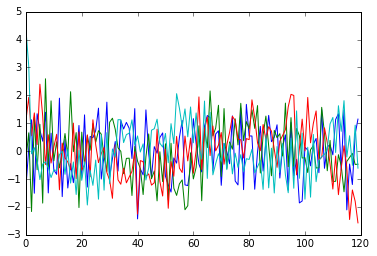

In [19]:
# Data in standard score
data = load_data(fname, mask=mask, standardize=True)
print(data.shape)
for vx in voxels:
    plt.plot(data[:, vx])

(2)

In [41]:
# Unmasking data
def unmask_data(data, mask):
    
    """Unmask 1D or 2D data (put back into 3D brain shape)
    Parameters
    ----------
    data : array (1D or 2D)
        Data to be unmasked. Must be 1D or 2D, not more.
    mask : array (bool)
        Boolean mask that was used to mask data.
    """
    if np.ndim(data)==1:
        data_unmasked = np.zeros(mask.shape)
        data_unmasked[mask] = data
    elif np.ndim(data)==2:
        data_unmasked = np.zeros((data.shape[0],)+mask.shape)
        data_unmasked[:, mask] = data
    return data_unmasked # 3D or 4D data

In [44]:
# Demonstrate that this works
print(data.shape)

# 2D --> 4D
data_2d_unmasked = unmask_data(data, mask=mask)
print(data_2d_unmasked.shape)

# 1D --> 4D
data_1d_unmasked = unmask_data(data[0], mask=mask)
print(data_1d_unmasked.shape)

(120, 38543)
(120, 30, 100, 100)
(30, 100, 100)


In [45]:
# From Lab7
# Solution 2.
# Write a more general function than plot_horizontal_slices() 
# (call it slice_3d_array) that can show slices in arbitrary dimensions 
# (depending on a keyword argument). 
# Reproduce these plots for different types of slices (coronal, sagittal).
def slice_3d_array(vol, axis=0, **kwargs):
    
    """Function to plot slices of a 3D array along a given axis."""
    
    nslices = vol.shape[axis]
    fig = plt.figure(figsize=(10,10))
    subplot_size = np.ceil(np.sqrt(nslices))
    print("{} slices will be visualized".format(nslices))

    for s in range(nslices):
        ax = fig.add_subplot(subplot_size, subplot_size, s+1)
        if axis==0:
            slices = vol[s,:,:]
        elif axis==1:
            slices = vol[:,s,:]
        elif axis==2:
            slices = vol[:,:,s]

        plt.imshow(slices, **kwargs)
        ax.axis('off')

30 slices will be visualized
30 slices will be visualized


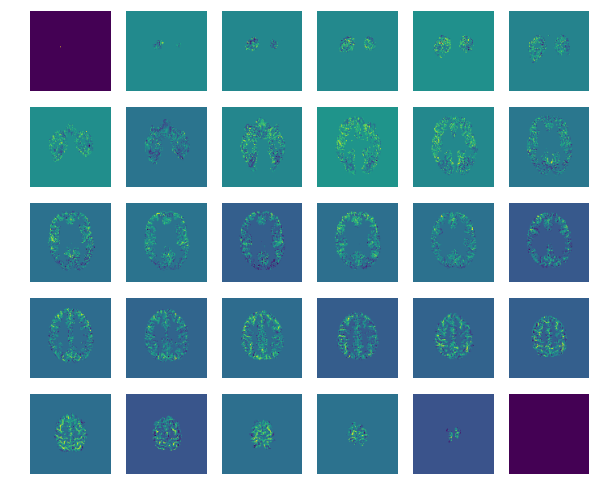

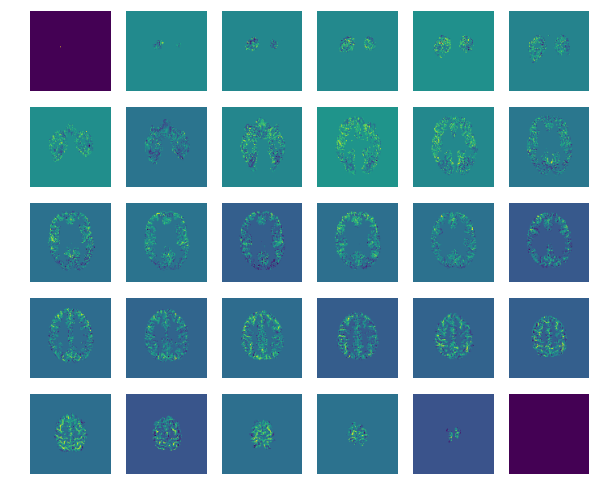

In [47]:
slice_3d_array(data_1d_unmasked, axis=0, cmap='viridis')
slice_3d_array(data_2d_unmasked[0], axis=0, cmap='viridis')

(3)

In [ ]:
def event_avg(data, onsets, n_timepoints=10):    
    return tc_avg # data averaged over repeats of a condition for n_timepoints after condition onsets

In [ ]:
# Demonstrate that this works